In [2]:
import warnings
warnings.filterwarnings('ignore')

[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
  0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
  0.3130677  -0.85409574 -2.55298982  0.6536186   0.8644362  -0.74216502
  2.26975462 -1.45436567  0.04575852 -0.18718385  1.53277921  1.46935877]


<Axes: ylabel='Density'>

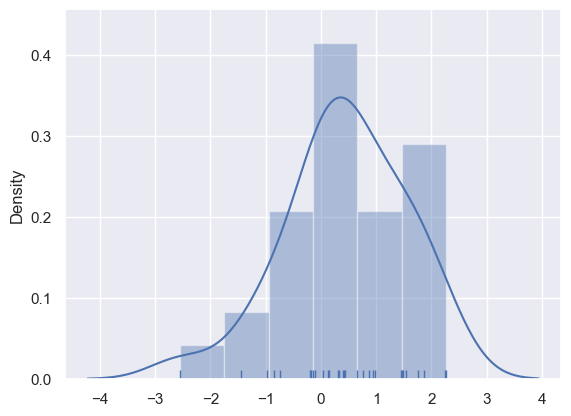

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(color_codes=True)

np.random.seed(0)
x = np.random.normal(0, 1, size=30)
print(x)
sns.distplot(x, rug=True)

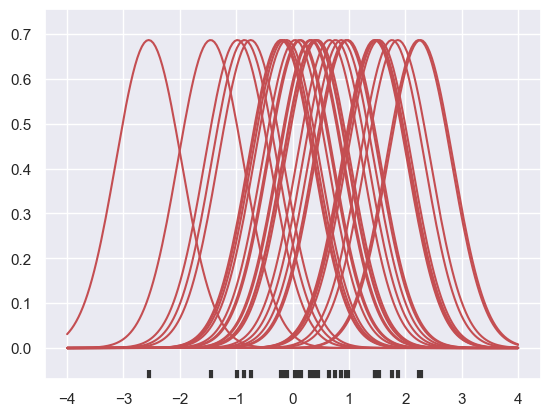

In [9]:
from scipy import stats

#x = np.random.normal(0, 1, size=30)
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.)
# bandwidth = 표준편차 역할
# 이 수식이 최적이 bandwidth라고 학계에서 인정받음
support = np.linspace(-4, 4, 200)

kernels = []
for x_i in x:
    kernel = stats.norm(x_i, bandwidth).pdf(support) # pdf= 확률 밀도 함수
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")

sns.rugplot(x, color=".2", linewidth=3);

# 그래

# 그래프에 있는 모든 pdf를 MeanShift에서 합쳐준다.

In [13]:
len(kernels), len(kernels[0])

(30, 200)

In [22]:
kernels[0]

array([2.82531523e-22, 5.60188742e-22, 1.10540472e-21, 2.17083956e-21,
       4.24281026e-21, 8.25275527e-21, 1.59758434e-20, 3.07785457e-20,
       5.90135673e-20, 1.12609521e-19, 2.13854223e-19, 4.04184840e-19,
       7.60259196e-19, 1.42318978e-18, 2.65144989e-18, 4.91613162e-18,
       9.07158247e-18, 1.66595044e-17, 3.04481263e-17, 5.53832631e-17,
       1.00257295e-16, 1.80622934e-16, 3.23854010e-16, 5.77889942e-16,
       1.02626724e-15, 1.81382451e-15, 3.19043236e-15, 5.58500142e-15,
       9.73008214e-15, 1.68705483e-14, 2.91112840e-14, 4.99934372e-14,
       8.54444985e-14, 1.45336496e-13, 2.46028114e-13, 4.14490196e-13,
       6.94965523e-13, 1.15966281e-12, 1.92583764e-12, 3.18292998e-12,
       5.23544946e-12, 8.57038497e-12, 1.39625956e-11, 2.26386990e-11,
       3.65305524e-11, 5.86651908e-11, 9.37614269e-11, 1.49137686e-10,
       2.36085908e-10, 3.71939414e-10, 5.83168170e-10, 9.09986382e-10,
       1.41317338e-09, 2.18411486e-09, 3.35950253e-09, 5.14273259e-09,
      

In [26]:
from scipy.integrate import trapz # 각 구간별 y에 대한 적분
                                # 200개 구간에 대한 적분
density = np.sum(kernels, axis = 0) # 

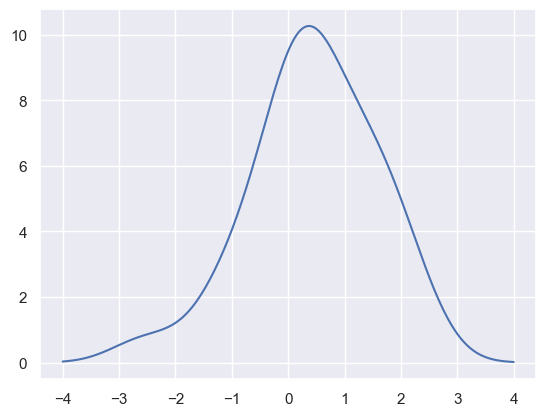

In [27]:
plt.plot(support, density)

In [29]:
trapz(density, support) # 정규화 값 (모두 적분한 뒤ㅣ 더한건가..?)

29.99071526337815

In [30]:
density /= trapz(density, support)

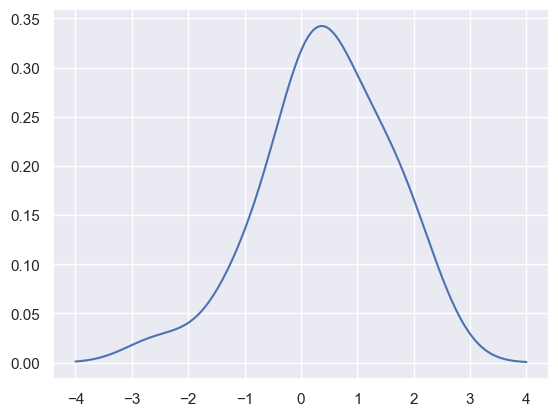

In [31]:
plt.plot(support, density)

<Axes: ylabel='Density'>

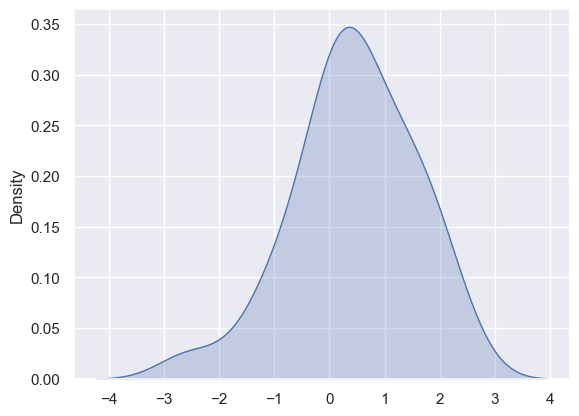

In [32]:
# seaborn의 kdeplot()으로 kde 곡선을 바로 구할 수 있다.
sns.kdeplot(x, shade= True)

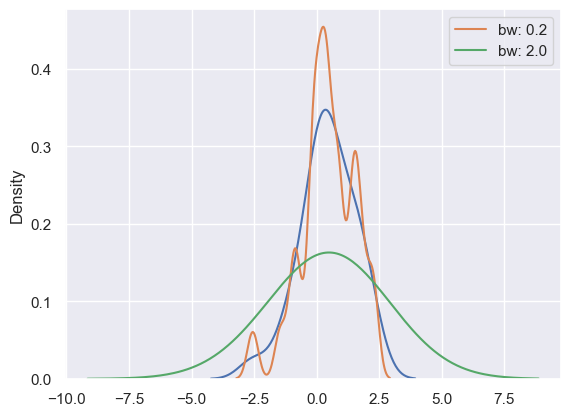

In [36]:
sns.kdeplot(x)
sns.kdeplot(x, bw=0.2, label = 'bw: 0.2')
sns.kdeplot(x, bw =2, label ='bw: 2.0')
plt.legend()

# 사이킷런의 MeanShift 사용하기

In [37]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3, 
                  cluster_std=0.8, random_state=0)

In [43]:
X, y

(array([[-1.69242695,  3.62202539],
        [ 0.69794036,  4.4288665 ],
        [ 1.10022802,  4.60631734],
        [-1.44872404,  3.38424521],
        [ 1.21486062,  5.36489604],
        [-0.90830163,  1.97077775],
        [ 2.47211942,  0.43703328],
        [ 1.65684156,  2.4412893 ],
        [ 1.07779975,  4.62537882],
        [-1.67942681,  2.60200265],
        [ 0.65372852,  5.28174338],
        [-0.97188549,  2.79022351],
        [ 1.58510026,  4.40112734],
        [ 1.29307545,  3.42933812],
        [ 0.25043139,  4.34534364],
        [-1.07307179,  2.73974218],
        [ 2.68432989,  0.52452838],
        [ 2.16883005,  0.64220093],
        [ 0.32575305,  2.92276125],
        [-3.15145159,  4.56947655],
        [-1.06408682,  3.19760583],
        [ 1.45946366,  0.23651283],
        [ 1.01287689,  4.15404025],
        [ 1.73407165,  4.17977925],
        [-3.3313554 ,  2.09987679],
        [-0.3148482 ,  4.1335951 ],
        [ 1.5403728 , -0.88105886],
        [-2.13821915,  1.767

In [39]:
meanshift = MeanShift(bandwidth =0.9)

cluster_labels = meanshift.fit_predict(X)
print('클러스터의 유형: {}'.format(np.unique(cluster_labels)))


클러스터의 유형: [0 1 2 3 4 5 6 7]


In [40]:
import pandas as pd

sample_data_df = pd.DataFrame(
        data=X,
        columns = ['x1','x2'])

sample_data_df['cluster'] = cluster_labels
sample_data_df.head()

,x1,x2,cluster
0,-1.692427,3.622025,5
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,1
4,1.214861,5.364896,4


<Axes: xlabel='x1', ylabel='x2'>

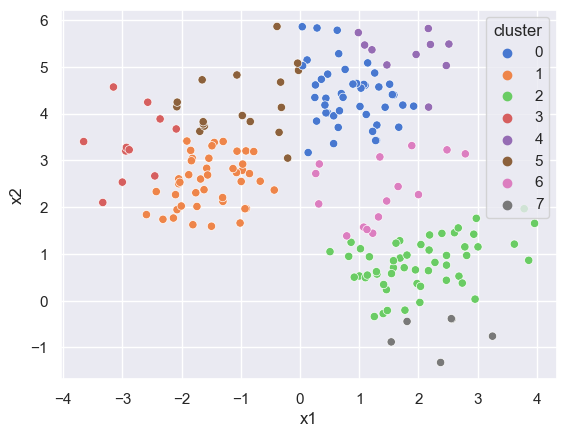

In [42]:
sns.scatterplot(
        x= 'x1',
        y='x2',
        hue = 'cluster',
        palette = 'muted',
        data = sample_data_df)

In [48]:
# bandwidth 증가시켜 보겠다.

meanshift = MeanShift(bandwidth = 1.0)
cluster_labels = meanshift.fit_predict(X)
print('클러스터의 유형: {}'.format(np.unique(cluster_labels)))


클러스터의 유형: [0 1 2]


In [50]:
import pandas as pd

sample_data_df = pd.DataFrame(
        data=X,
        columns = ['x1','x2'])

sample_data_df['cluster'] = cluster_labels
sample_data_df.head()

,x1,x2,cluster
0,-1.692427,3.622025,1
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,1
4,1.214861,5.364896,0


<Axes: xlabel='x1', ylabel='x2'>

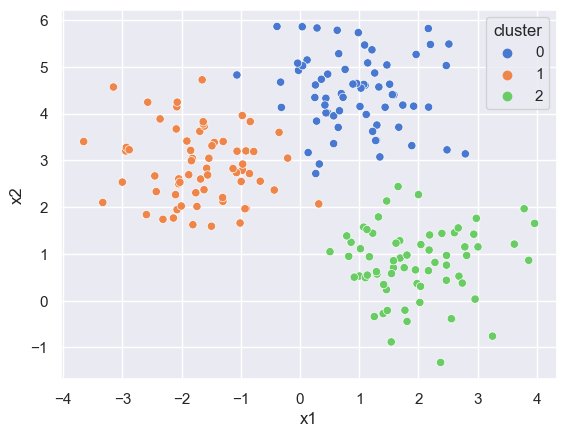

In [51]:
sns.scatterplot(
        x= 'x1',
        y='x2',
        hue = 'cluster',
        palette = 'muted',
        data = sample_data_df)

- 최적의 bandwidth 찾아내기

In [53]:
# 어떤 bandwidth가 최적일까? - estimate_bandwidth()함수 사용해보기
from sklearn.cluster import estimate_bandwidth 

best_bandwidth  = estimate_bandwidth(X, quantile = 0.25)
best_bandwidth


1.6889636737559222

In [56]:
meanshift = MeanShift(bandwidth = best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('클러스터의 유형: {}'.format(np.unique(cluster_labels)))


클러스터의 유형: [0 1 2]


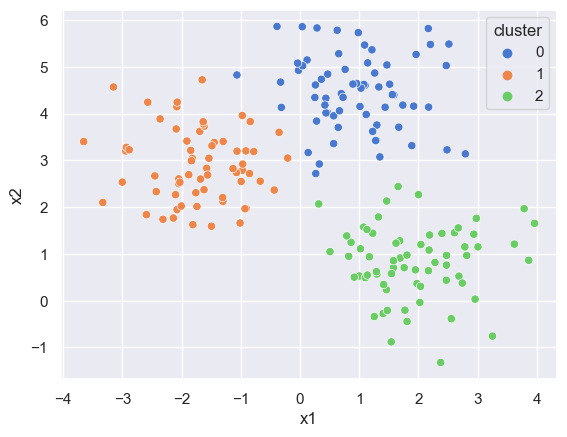

In [58]:
sample_data_df = pd.DataFrame(
    data=X,
    columns=["x1", "x2"]
)

sample_data_df['cluster'] = cluster_labels

sns.scatterplot(
    x='x1',
    y='x2',
    hue='cluster',
    palette='muted',
    data=sample_data_df
)
plt.show()

In [59]:
meanshift.cluster_centers_ #중심점, 제일 데이터가 많은 곳에 위치

array([[ 0.90425412,  4.43969979],
       [-1.63547329,  2.84588284],
       [ 1.84011231,  0.83840976]])

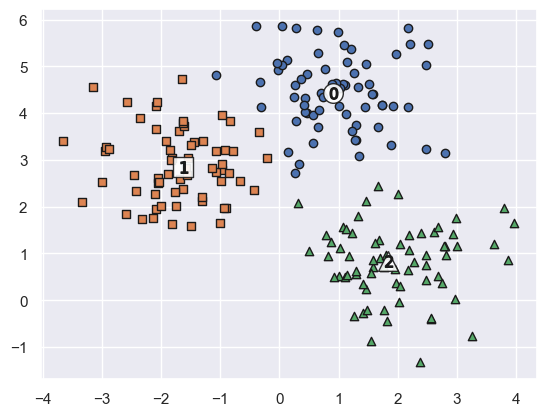

In [60]:
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

clusterDF['meanshift_label']  = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]
    # 군집별로 다른 marker로 scatter plot 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', 
                marker=markers[label] )
    
    # 군집별 중심 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                edgecolor='k', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)
    
plt.show()